# Natural Language Processing and Recommender systems

## 1. Explain natural language processing in your own words

Natural Language Processing or NLP is a field of Artificial Intelligence that gives the machines the ability to read, understand and derive meaning from human languages.
It is a discipline that focuses on the interaction between data science and human language.

## 2. Discuss what is word embedding, lemmatization, stemming

##### Word Embedding
They are vector representations of a particular word.</br>
Word2Vec is a method to construct such an embedding. It can be obtained using two methods (both involving Neural Networks): Skip Gram and Common Bag Of Words (CBOW) </br>
1. CBOW Model: This method takes the context of each word as the input and tries to predict the word corresponding to the context.
2. Skip Gram : We input the target word into the network. The model outputs C probability distributions. For each context position, we get C probability distributions of V probabilities, one for each word.


##### Lemmatization
In contrast to stemming, lemmatization looks beyond word reduction and considers a language’s full vocabulary to apply a morphological analysis to words. The lemma of ‘was’ is ‘be’ and the lemma of ‘mice’ is ‘mouse’.
Lemmatization looks at surrounding text to determine a given word’s part of speech, it does not categorize phrases.

##### Stemming 
Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers.
Stemming is a somewhat crude method for cataloging related words; it essentially chops off letters from the end until the stem is reached. 
Stemming has its drawbacks. If given the token saw, stemming might always return saw, whereas lemmatization would likely return either see or saw depending on whether the use of the token was as a verb or a noun.

## 3. What is TF-IDF?

In information retrieval,TF–IDF short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling.

The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.

## 4. What do you mean by recommender systems?

Recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch like in Netflix or products to buy like in Amazon).

## 5. Compare and Contrast content based vs collaborative recommender systems.

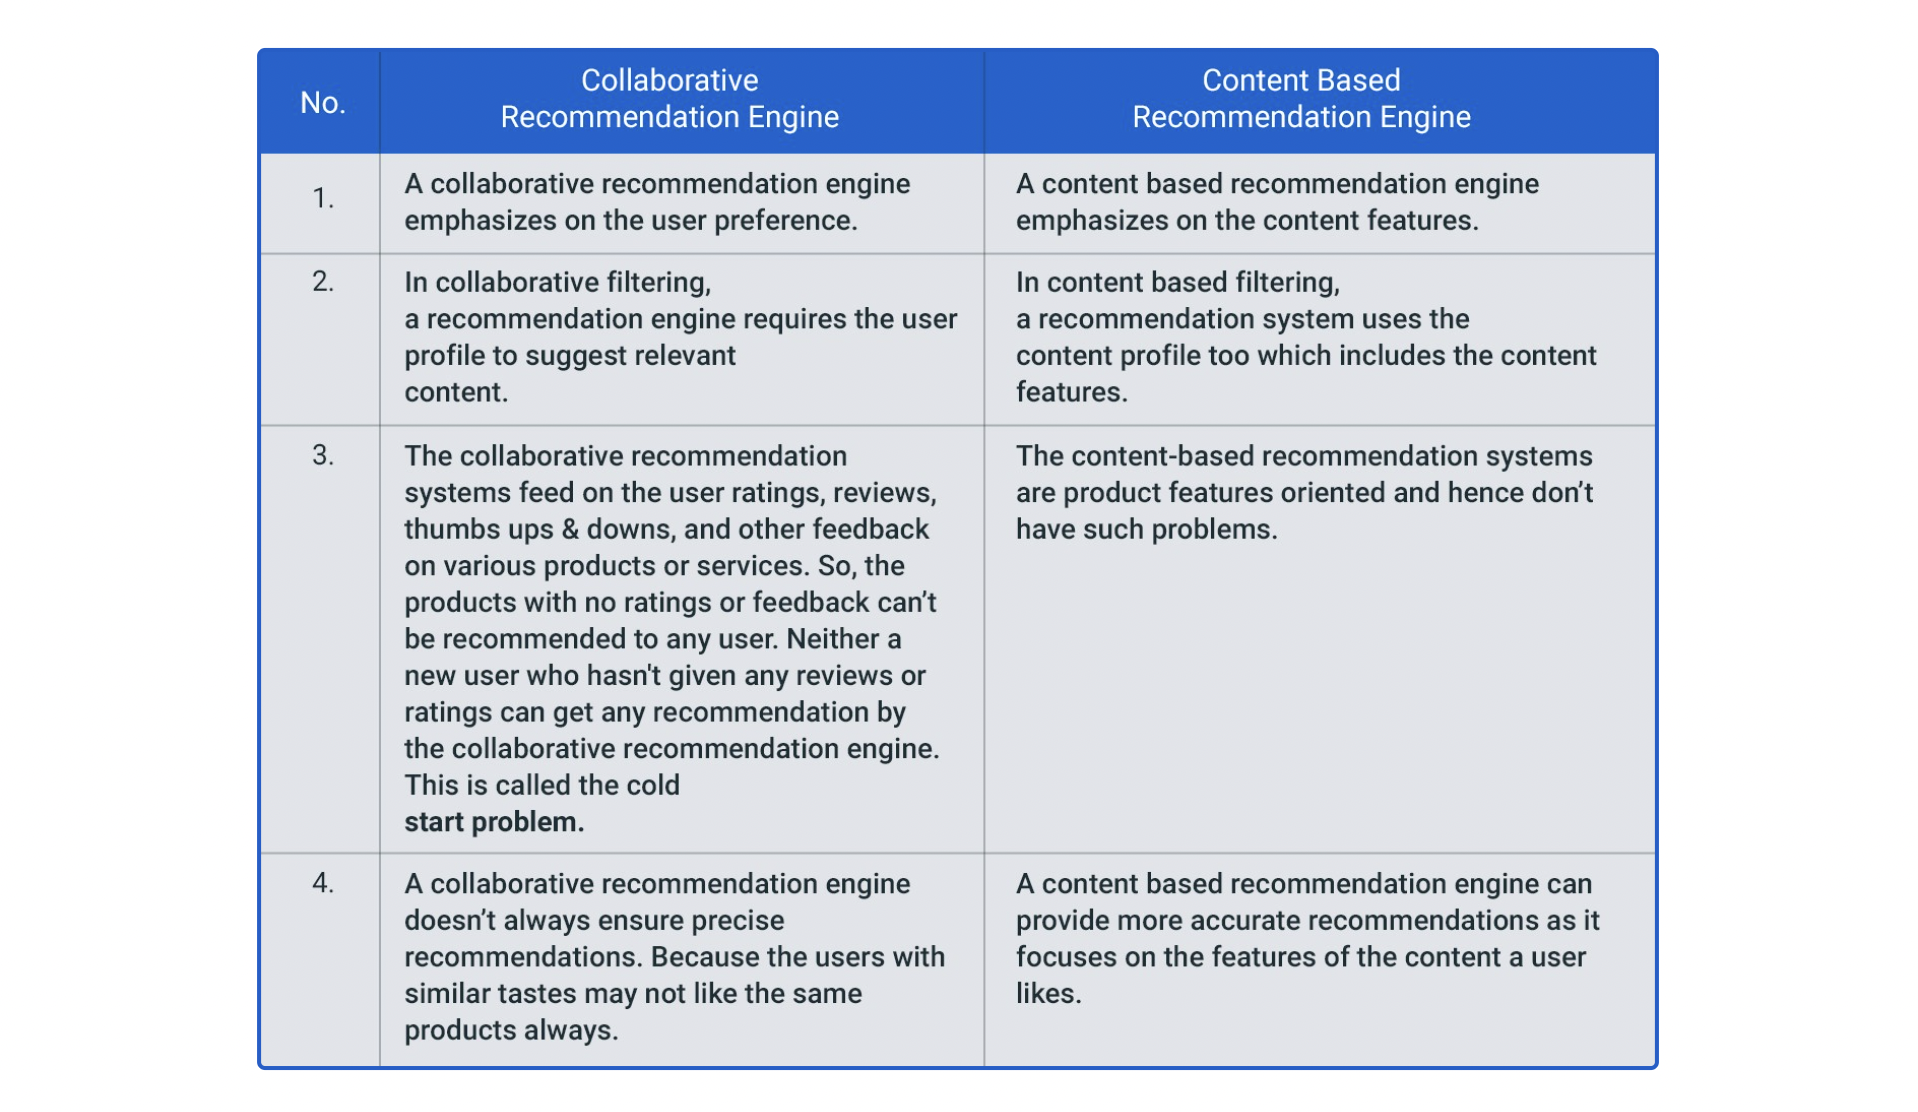

## 6. Discuss any 3 similarity metrics.

1. Jaccard similarity: 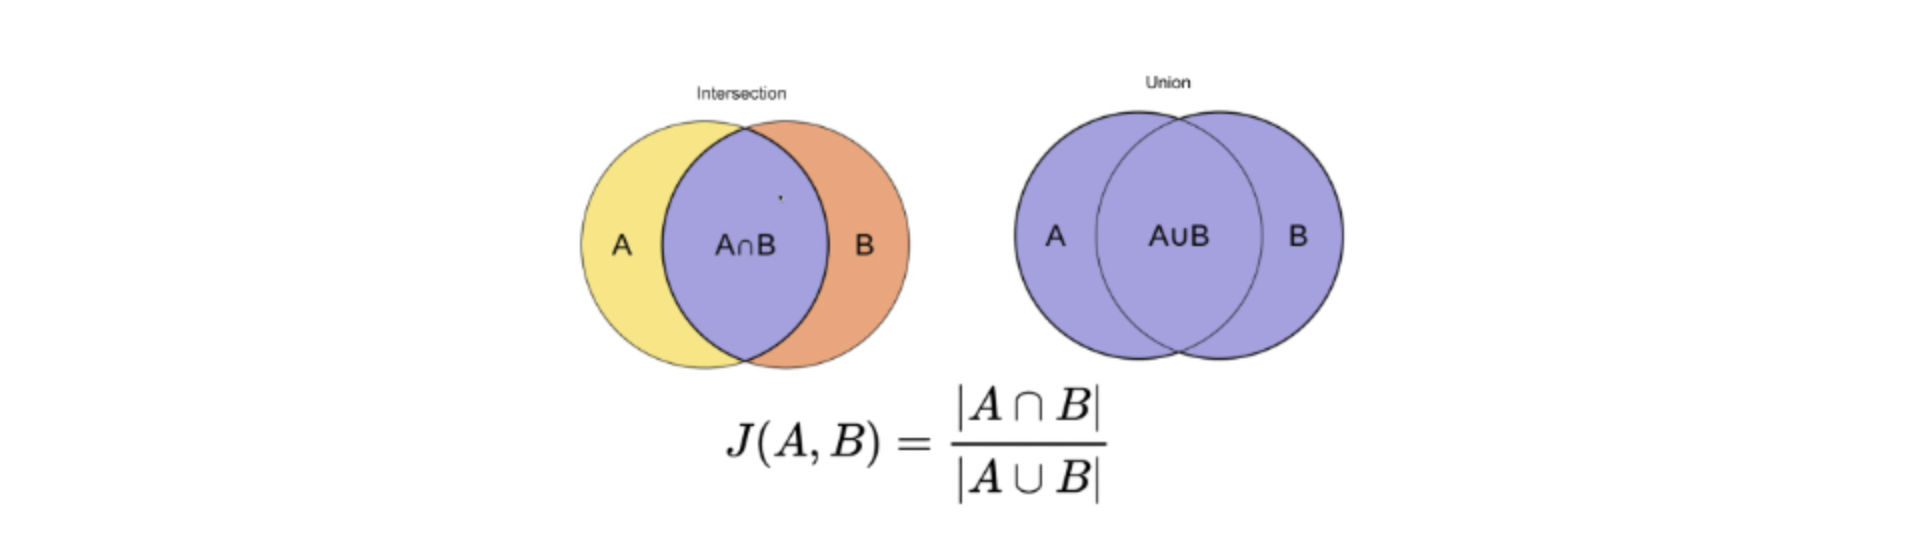Jaccard similarity is for comparing two binary vectors (sets).The Jaccard similarity turns out to be useful by detecting duplicates.


2. Cosine Similarity
The cosine similarity calculates the cosine of the angle between two vectors.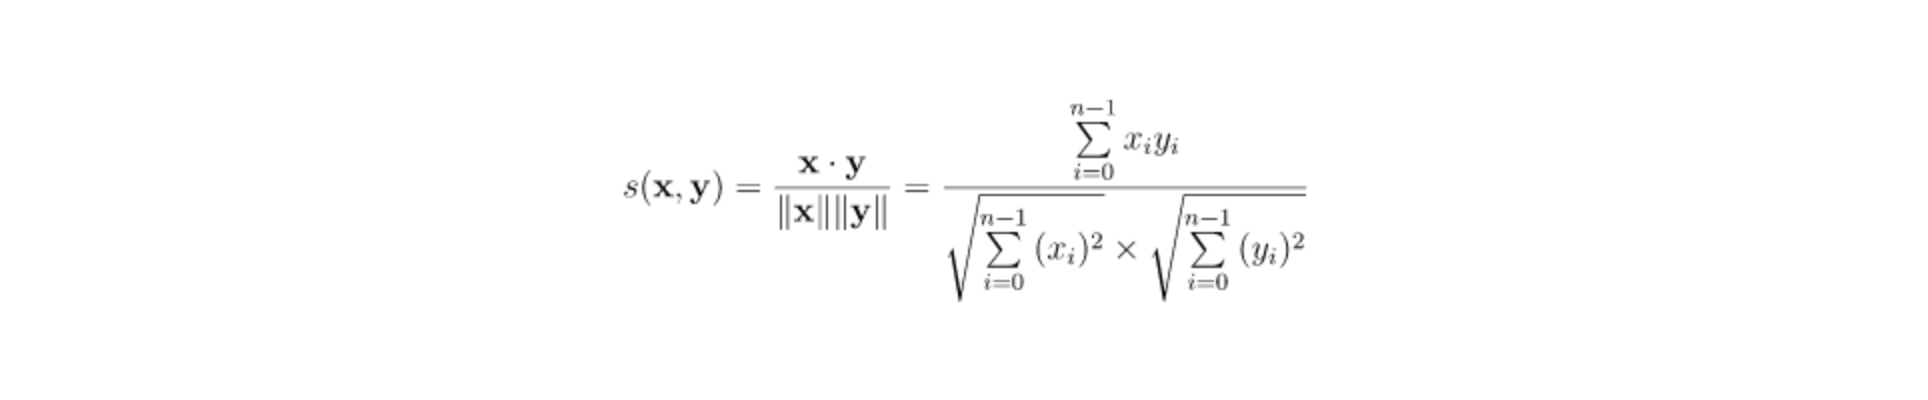

3. Pearson’s Correlation
Correlation is a technique for investigating the relationship between two quantitative, continuous variables, for example, age and blood pressure. Pearson’s correlation coefficient is a measure related to the strength and direction of a linear relationship.
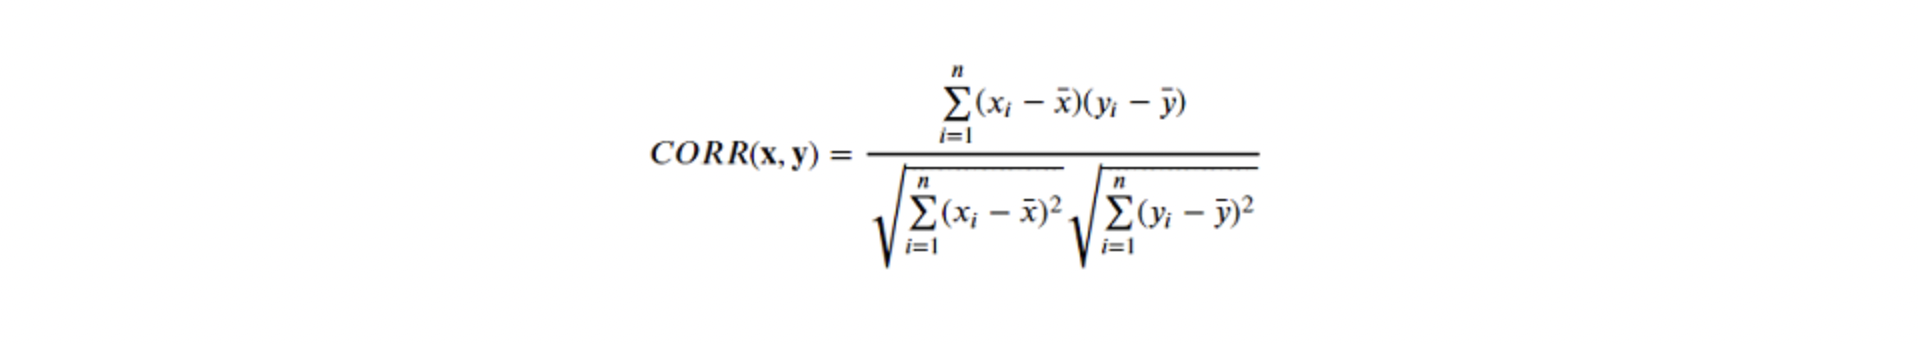

## 7. What are sparse matrices and how do you create them in python?

A sparse matrix is a matrix that is comprised of mostly zero values. A matrix is sparse if many of its coefficients are zero.

Python’s SciPy gives tools for creating sparse matrices using multiple data structures, as well as tools for converting a dense matrix to a sparse matrix. The function csr_matrix() is used to create a sparse matrix of compressed sparse row format whereas csc_matrix() is used to create a sparse matrix of compressed sparse column format.

In [3]:
# Python program to create
# sparse matrix using csr_matrix()

# Import required package
import numpy as np
from scipy.sparse import csr_matrix

# Creating a 3 * 4 sparse matrix
sparseMatrix = csr_matrix((3, 4),dtype = np.int8).toarray()

# Print the sparse matrix
print(sparseMatrix)


[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


## 8. Perform negative and positive text classification on nltk movie recommendation dataset, explain each steps performed.

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
from nltk import word_tokenize,sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
from nltk.corpus import stopwords
import warnings; warnings.simplefilter('ignore')

In [43]:
#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for part-of-speech tagging
from nltk import pos_tag

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#modelling algos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

#model_selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation
from sklearn.metrics import accuracy_score,roc_auc_score 
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

#preprocessing scikit
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder


In [7]:
# import nltk
# nltk.download('stopwords')

In [8]:

from nltk.corpus import movie_reviews

In [9]:
movie_reviews.words()

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]

In [10]:
mr=movie_reviews

In [11]:
# reading text from file and storing it in a array.
file_ids=mr.fileids()
neg_rev=[]
pos_rev=[]

#for negative reviews
for file in file_ids[:1000]:
    rev=str(mr.raw(file))
    neg_rev.append(rev)
    
#for positive reviews
for file in file_ids[1000:]:
    rev=str(mr.raw(file))
    pos_rev.append(rev)

In [12]:
print(len(pos_rev))
print(len(neg_rev))

1000
1000


We have 1000 positive and 1000 negative reviews.

In [13]:
print(pos_rev[2])
# Printing a positive review

you've got mail works alot better than it deserves to . 
in order to make the film a success , all they had to do was cast two extremely popular and attractive stars , have them share the screen for about two hours and then collect the profits . 
no real acting was involved and there is not an original or inventive bone in it's body ( it's basically a complete re-shoot of the shop around the corner , only adding a few modern twists ) . 
essentially , it goes against and defies all concepts of good contemporary filmmaking . 
it's overly sentimental and at times terribly mushy , not to mention very manipulative . 
but oh , how enjoyable that manipulation is . 
but there must be something other than the casting and manipulation that makes the movie work as well as it does , because i absolutely hated the previous ryan/hanks teaming , sleepless in seattle . 
it couldn't have been the directing , because both films were helmed by the same woman . 
i haven't quite yet figured out what i like

In [14]:
print(neg_rev[2])
# Printing a negative review

it is movies like these that make a jaded movie viewer thankful for the invention of the timex indiglo watch . 
based on the late 1960's television show by the same name , the mod squad tells the tale of three reformed criminals under the employ of the police to go undercover . 
however , things go wrong as evidence gets stolen and they are immediately under suspicion . 
of course , the ads make it seem like so much more . 
quick cuts , cool music , claire dane's nice hair and cute outfits , car chases , stuff blowing up , and the like . 
sounds like a cool movie , does it not ? 
after the first fifteen minutes , it quickly becomes apparent that it is not . 
the mod squad is certainly a slick looking production , complete with nice hair and costumes , but that simply isn't enough . 
the film is best described as a cross between an hour-long cop show and a music video , both stretched out into the span of an hour and a half . 
and with it comes every single clich ? . 
it doesn't really 

In [15]:
# Now we need to create labels for both positive and negative reviews
pos_label=[]
neg_label=[]
i =0
for i in range(len(pos_rev)):
    pos_label.append("Positive")

i=0
for i in range(len(neg_rev)):
    neg_label.append("Negative")


In [16]:
# Checking length of labels
print(len(pos_label))
print(len(neg_label))

1000
1000


In [17]:
# Convert arrays to pandas dataframe 
i =0
index=[]
for i in range(1000):
    index.append(i)
pos_df=pd.DataFrame(index=index,columns = ['Review','Sentiment'])
neg_df=pd.DataFrame(index=index,columns = ['Review','Sentiment'])

In [18]:
i=0
for i in range(1000):
    rev=pos_rev[i]
    pos_df.loc[i,'Review']=rev
    pos_df.loc[i,'Sentiment']=pos_label[i]
i=0
for i in range(1000):
    revn=neg_rev[i]
    neg_df.loc[i,'Review']=revn
    neg_df.loc[i,'Sentiment']=neg_label[i]

In [19]:
neg_df.head()

,Review,Sentiment
0,"plot : two teen couples go to a church party ,...",Negative
1,the happy bastard's quick movie review \ndamn ...,Negative
2,it is movies like these that make a jaded movi...,Negative
3,""" quest for camelot "" is warner bros . ' firs...",Negative
4,synopsis : a mentally unstable man undergoing ...,Negative


In [20]:
# Combining the positive and negative reviews into a single dataframe
df = pd.concat([pos_df,neg_df],ignore_index=True)

In [21]:
df.loc[df['Sentiment'] == 'Negative']

,Review,Sentiment
1000,"plot : two teen couples go to a church party ,...",Negative
1001,the happy bastard's quick movie review \ndamn ...,Negative
1002,it is movies like these that make a jaded movi...,Negative
1003,""" quest for camelot "" is warner bros . ' firs...",Negative
1004,synopsis : a mentally unstable man undergoing ...,Negative
...,...,...
1995,"if anything , "" stigmata "" should be taken as ...",Negative
1996,"john boorman's "" zardoz "" is a goofy cinematic...",Negative
1997,the kids in the hall are an acquired taste . \...,Negative
1998,there was a time when john carpenter was a gre...,Negative


In [27]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/shreyahunur/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [28]:
# Using Lemmatization to normalize the text
i=0
le=WordNetLemmatizer()
for string in df['Review']:
    tokens=word_tokenize(string)
    temp=set()
    for token in tokens:
        stem_token=le.lemmatize(token)
        temp.add(stem_token)
    temp_str=" ".join(temp)
    df.loc[i,"Review"]=temp_str
    i=i+1 

##### TF IDF 
It stands for term frequency inverse document frequency and it is a measure that can quantify the importance or relevance of string representations (words, phrases, lemmas, etc ) in a document amongst a collection of documents. 

##### TfidfVectorizer:
It is the overall document weightage of a word. It helps us in dealing with most frequent words.

##### Word 2 vec 
It is a group of related models that are used to produce word embeddings.

In [31]:
# Extracting features from the text
vect = TfidfVectorizer(stop_words = nltk.corpus.stopwords.words('english') )


In [32]:
X = vect.fit_transform(df['Review'])

In [33]:
Y = df['Sentiment']

In [34]:
print(vect.get_feature_names())

['00', '000', '0009f', '007', '00s', '03', '04', '05', '05425', '10', '100', '1000', '10000', '100m', '101', '102', '103', '104', '105', '106', '107', '108', '109', '10b', '10th', '11', '110', '111', '112', '113', '1138', '114', '115', '117', '118', '11th', '12', '121', '122', '123', '125', '126', '127', '1272', '128', '129', '1298', '12th', '13', '130', '1305', '131', '132', '133', '135', '137', '138', '139', '13th', '14', '140', '1400', '143', '144', '14th', '15', '150', '1500s', '150th', '151', '152', '1521', '153', '155', '1554', '157', '1583', '1590', '15th', '16', '160', '1600', '1600s', '161', '165', '167', '1692', '16mm', '16th', '16x9', '17', '170', '1700s', '1709', '172', '175', '1773', '1791', '1792', '1793', '1794', '1799', '17th', '18', '180', '1800', '1800s', '1812', '1830s', '1839', '1847', '1862', '1865', '1869', '1871', '1885', '1888', '189', '1896', '1898', '1899', '18s', '18th', '19', '1900', '1900s', '1903', '1908', '1912', '1913', '1914', '1916', '1919', '1920s', '

In [35]:
# Creating a Document Term Matrix (DTM)
dtm_df=pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

In [39]:
le = LabelEncoder()
dtm_df['Sentiment']=le.fit_transform(df['Sentiment'])

In [40]:
dtm_df.head()

,00,000,0009f,007,00s,03,04,05,05425,10,...,zulu,zundel,zurg,zus,zweibel,zwick,zwigoff,zycie,zzzzzzz,Sentiment
0,0.07535,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.00000,0.044137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [45]:
X_train,X_test,y_train,y_test=train_test_split(dtm_df.drop(['Sentiment'],axis=1),dtm_df['Sentiment'],test_size=0.20,random_state=42)


In [46]:
model=RandomForestClassifier(criterion='gini', max_depth= 20)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=20)

In [47]:
y_predicted=model.predict(X_test)
print('Accuracy: ', round(accuracy_score(y_test, y_predicted),4))

Accuracy:  0.725


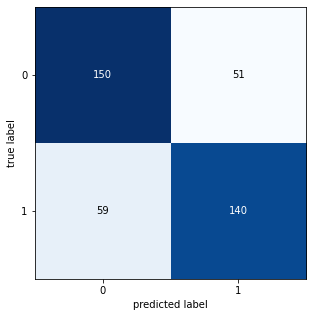

In [48]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_predicted)
fig, ax = plot_confusion_matrix(conf_mat=conf_mat ,  figsize=(10, 5))
plt.show()

## 9. Perform content based movie recommendation on the dataset given and explain each steps in detail.

In [26]:
md = pd.read_csv('movies_metadata.csv')
md.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [27]:
md = md[['id','overview', 'title']]
md.head()

,id,overview,title
0,862,"Led by Woody, Andy's toys live happily in his ...",Toy Story
1,8844,When siblings Judy and Peter discover an encha...,Jumanji
2,15602,A family wedding reignites the ancient feud be...,Grumpier Old Men
3,31357,"Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale
4,11862,Just when George Banks has recovered from his ...,Father of the Bride Part II


In [28]:
md['overview']= md['overview'].fillna('')

In [29]:
md['overview'] = md['overview'].str.lower()

In [30]:
import re
def msg_preprocessing(sent):
    
    # Removing the special characters from msgs
    sentence = re.sub('[^a-zA-Z]', ' ', sent)
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    
    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    
    # Removing stop words
    stops = stopwords.words('english')
    for word in sentence.split():
        if word in stops:
            sentence = sentence.replace(word, '')
    return sentence.lower()



In [31]:
md['overview'] = md['overview'].apply(msg_preprocessing)

In [32]:
md['overview']

0        led  woody y ys live happily   room  y birthda...
1         siblings judy  peter dcover  enchted board ga...
2         fmily weddg reignites  ncient feud  next door...
3        cheated  mistreated  stepped   women  holding ...
4          george bnks  recovered   dughter wedding  re...
                               ...                        
45461                         rising  falling  man  woman 
45462     artist struggles  fish  work  sryle  cult pla...
45463     one   hits goes wrong pressional assassin end...
45464     sm wn live two brors one mter   or one hunchb...
45465     years  decrimalisation  homosexuality   uk di...
Name: overview, Length: 45466, dtype: object

In [34]:
# Constructing TF-IDF matrix
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0)
tfidf_matrix = tf.fit_transform(md['overview'])

In [35]:
tfidf_matrix.shape

(45466, 1198902)

In [37]:
# Compute cosine similarity score between movies
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [38]:
cosine_sim[0]

array([1.        , 0.00804214, 0.        , ..., 0.        , 0.00233253,
       0.        ])

In [39]:
md = md.reset_index()
titles = md['title']
indices = pd.Series(md.index, index=md['title'])

In [41]:
# Taking movie title as input and output 10 most similar movies
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [42]:
get_recommendations('The Godfather').head(10)

44030    The Godfather Trilogy: 1972-1990
1178               The Godfather: Part II
38030            A Mother Should Be Loved
16329               New York Confidential
36569                                Plan
8364                                 Fury
31973                    Honor Thy Father
30213                             Maqbool
28628                              Refuge
5689                  The Young Americans
Name: title, dtype: object

##### Reference

https://towardsdatascience.com/your-guide-to-natural-language-processing-nlp-48ea2511f6e1

https://towardsdatascience.com/stemming-vs-lemmatization-2daddabcb221

https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa

https://towardsdatascience.com/calculate-similarity-the-most-relevant-metrics-in-a-nutshell-9a43564f533e

https://www.geeksforgeeks.org/how-to-create-a-sparse-matrix-in-python/